# Insurance data annalysis python module 13

The description of the attributes in the dataset are as follows: 
<br> Premium Paid – Amount paid by the person<br>  Age – Indicates the age of the person <br> Days to renew – Days remaining to renew the policy <br> Claims made – Indicates the claims already made by the person <br> Income – Net income of the person


# Data Pre-processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [8]:
df = pd.read_csv("Insurance Dataset.csv",index_col= 0)

In [10]:
df.head()

,Age,Days to Renew,Claims made,Income
Premiums Paid,,,,
2800,26,233,3890.076336,28000
2950,27,130,2294.444444,29500
3100,28,144,2564.545455,31000
3250,30,65,1978.260870,32500
3400,32,56,2009.090909,34000


In [11]:
df.describe()

,Age,Days to Renew,Claims made,Income
count,100.000000,100.000000,100.000000,100.000000
mean,46.110000,120.400000,12578.993367,102250.000000
std,13.887641,88.055767,13695.906762,43517.237964
min,23.000000,1.000000,1978.260870,28000.000000
25%,34.000000,56.000000,5220.648735,65125.000000
50%,45.000000,89.000000,8386.043907,102250.000000
75%,54.500000,186.500000,14670.889520,139375.000000
max,82.000000,321.000000,99676.744190,176500.000000


In [12]:
df.isnull().sum() # there is no na value

Age              0
Days to Renew    0
Claims made      0
Income           0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 2800 to 26475
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            100 non-null    int64  
 1   Days to Renew  100 non-null    int64  
 2   Claims made    100 non-null    float64
 3   Income         100 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 3.9 KB


## EDA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002926B5B95C8>,
      dtype=object)

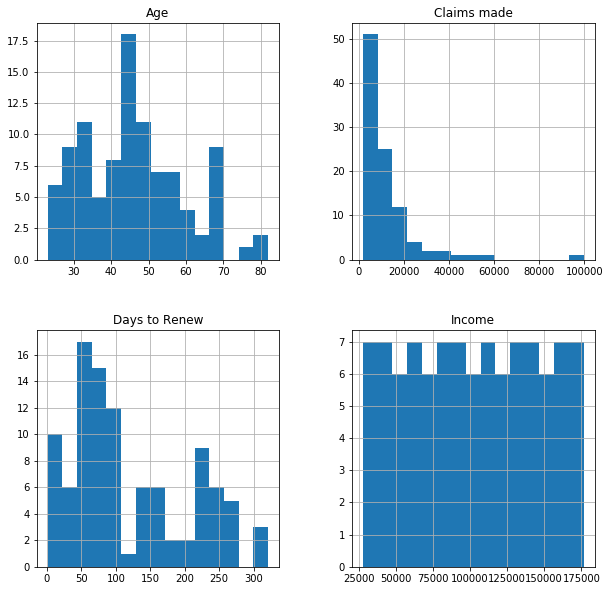

In [15]:
df.hist(bins=15,figsize=(10,10))

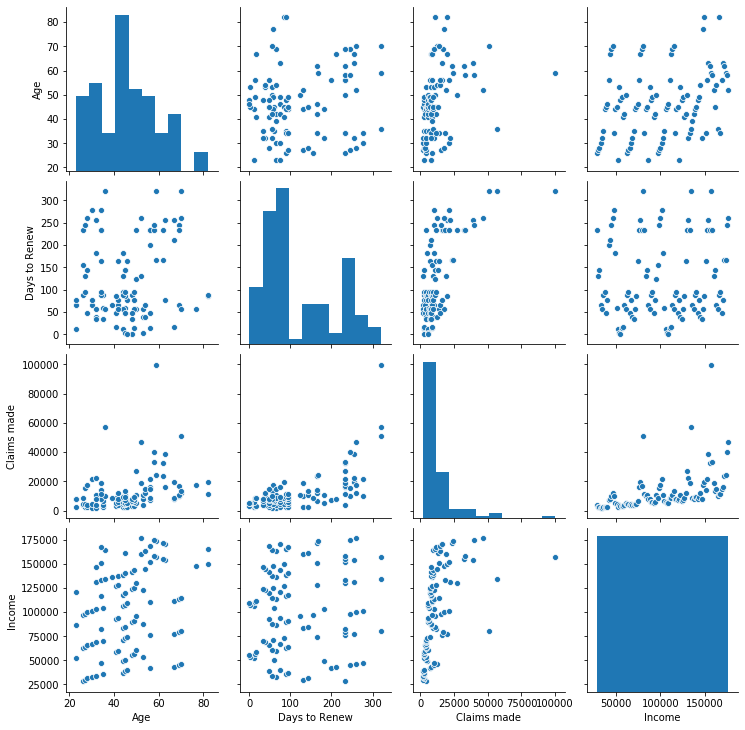

In [16]:
sns.pairplot(df)

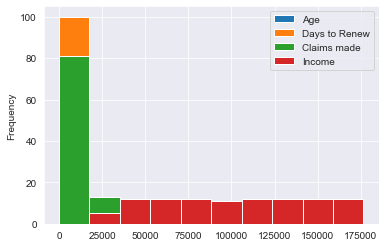

In [18]:
df.plot.hist() 
# blue explains murder, and red expains rape cases are very frequent

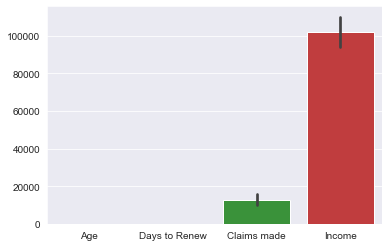

In [19]:
sns.barplot(data=df) # bar explains the expenses as compared to sat scores

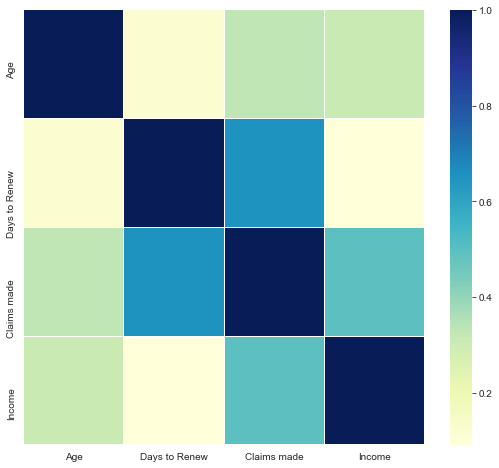

In [20]:
# Plot with Color in function of the cluster
corrmat = df.corr()
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

In [43]:
#standardize the data to normal distribution
from sklearn import preprocessing
standardized = preprocessing.scale(df)
print(standardized)
standardized = pd.DataFrame(standardized)

[[-1.45534514  1.28517712 -0.63761315 -1.71481604  0.78434416]
 [-1.38297591  0.10957105 -0.75470436 -1.68017329  0.78434416]
 [-1.31060669  0.26936217 -0.73488372 -1.64553055  0.78434416]
 [-1.16586823 -0.63231628 -0.77790666 -1.6108878   0.78434416]
 [-1.02112978 -0.73503914 -0.77564428 -1.57624505  0.78434416]
 [-0.8040221  -0.35838865 -0.75066759 -1.5416023   0.78434416]
 [-0.15269907 -0.28990674 -0.7393747  -1.50695955  0.78434416]
 [-0.08032984 -0.82634835 -0.76035769 -1.4723168   0.78434416]
 [-0.00796061 -0.50676611 -0.73758181 -1.43767406  0.78434416]
 [ 0.71573165  0.90852663 -0.41613381 -1.40303131 -1.48911717]
 [ 1.51179314  1.0340768  -0.36004641 -1.36838856 -1.48911717]
 [ 1.65653159  1.42214094 -0.17392863 -1.33374581 -1.48911717]
 [ 1.72890081  1.60475936 -0.02838138 -1.29910306 -1.48911717]
 [-0.87639133  1.79879143 -0.18541282 -1.26446031 -1.48911717]
 [-0.15269907  0.70308091 -0.56350257 -1.22981757 -1.48911717]
 [-0.08032984 -0.68938453 -0.59028472 -1.19517482  0.78

## Elbow method to visualize number of cluster necessary

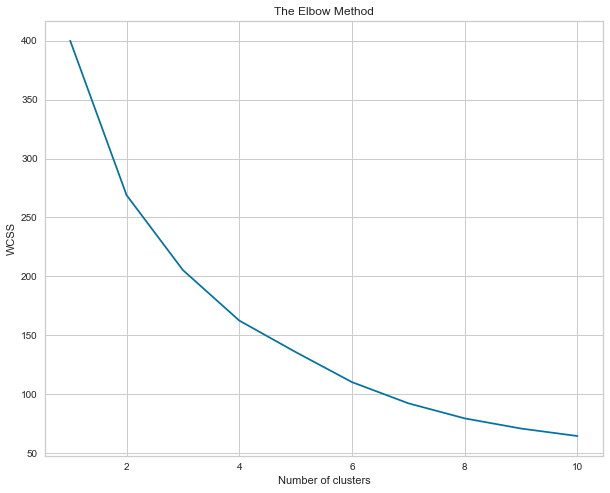

In [30]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(standardized)
    wcss.append(kmeans.inertia_) #criterion based on which K-means clustering works
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

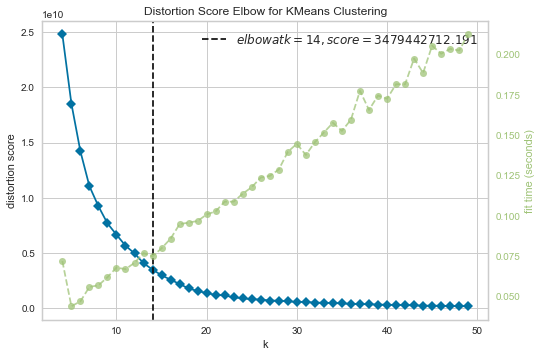

In [25]:
#!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
kmeans= KMeans()
visualizer = KElbowVisualizer(kmeans, k=(4,50)) # k: Number of cluster to be attempted
visualizer.fit(df)
visualizer.poof()

In [31]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(standardized)

y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 3, 0, 2, 0, 2, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 0, 0, 0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 3, 3, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3])

In [27]:
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans+1

# New list called cluster
cluster = list(y_kmeans1)
# Adding cluster to our data set
df['cluster'] = cluster

In [32]:
#Mean of clusters 1 to 4
kmeans_mean_cluster = pd.DataFrame(round(df.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Age,Days to Renew,Claims made,Income
cluster,,,,
1,47.3,228.2,14325.2,84775.0
2,51.6,73.4,11264.1,136973.0
3,37.0,73.4,4446.2,64857.1
4,57.2,273.9,49875.7,148937.5


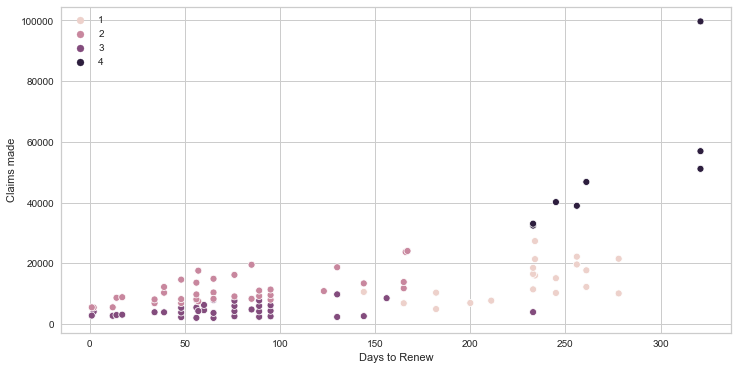

In [34]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.scatterplot(x=df['Days to Renew'], y = df['Claims made'],hue=y_kmeans1)

In [35]:
df[df['cluster']==1] # states are in cluster 1 

,Age,Days to Renew,Claims made,Income,cluster
Premiums Paid,,,,,
6225,56,200,6908.231707,41500,1
6450,67,211,7672.549020,43000,1
6675,69,245,10208.823530,44500,1
6900,70,261,12192.233010,46000,1
4750,34,278,10052.325580,47500,1
4900,44,182,4900.000000,49000,1
7450,46,165,6813.567839,74500,1
11400,56,234,15960.000000,76000,1
11625,67,256,19590.277780,77500,1


In [36]:
df[df['cluster']==2] # states are in cluster 2

,Age,Days to Renew,Claims made,Income,cluster
Premiums Paid,,,,,
13200,53,56,7800.000000,88000,2
14325,50,123,10818.049790,95500,2
10600,44,12,5480.681818,106000,2
10750,45,2,5404.696133,107500,2
10900,46,1,5465.013774,109000,2
16575,56,14,8619.000000,110500,2
16800,67,17,8811.527378,112000,2
17025,69,65,10363.043480,113500,2
23000,70,56,13590.909090,115000,2


In [37]:
df[df['cluster']==3] # states are in cluster 3

,Age,Days to Renew,Claims made,Income,cluster
Premiums Paid,,,,,
2800,26,233,3890.076336,28000,3
2950,27,130,2294.444444,29500,3
3100,28,144,2564.545455,31000,3
3250,30,65,1978.260870,32500,3
3400,32,56,2009.090909,34000,3
3550,35,89,2349.454545,35500,3
3700,44,95,2503.345725,37000,3
3850,45,48,2217.405063,38500,3
4000,46,76,2527.777778,40000,3


In [38]:
df[df['cluster']==4] # states are in cluster 4 

,Age,Days to Renew,Claims made,Income,cluster
Premiums Paid,,,,,
12075,70,321,51108.13953,80500,4
13450,36,321,56927.90698,134500,4
23100,63,256,38927.77778,154000,4
23325,62,233,32405.72519,155500,4
23550,59,321,99676.74419,157000,4
23775,58,233,33030.91603,158500,4
26250,58,245,40147.05882,175000,4
26475,52,261,46781.06796,176500,4


# 3D Visualisation

In [39]:
from mpl_toolkits.mplot3d import Axes3D
#!pip install --upgrade matplotlib
import mpl_toolkits

In [40]:
kmeans= KMeans(n_clusters=4)
k_fit =kmeans.fit(df)
clusters= k_fit.labels_
centers = kmeans.cluster_centers_

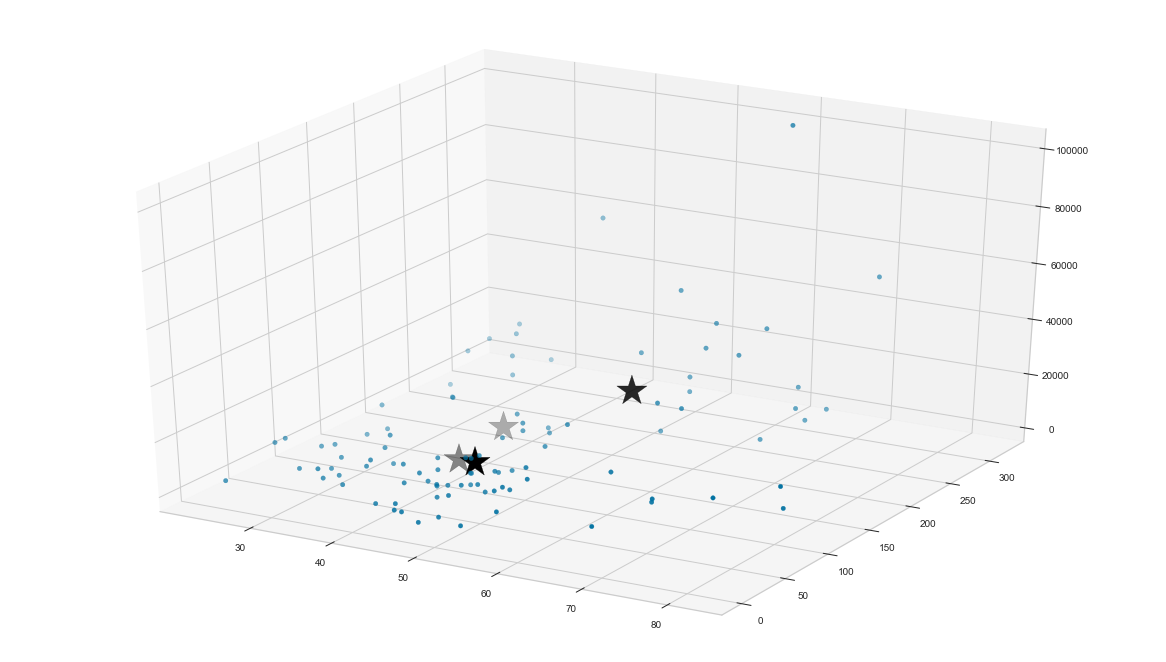

In [41]:
plt.rcParams["figure.figsize"] =(16,9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:,0],df.iloc[:,1],df.iloc[:,2])
ax.scatter(centers[:,0],centers[:,1],centers[:,2],c="black",marker="*",s = 1000);